In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms # transformations we can perform on our dataset
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)

device= "cuda" if torch.cuda.is_available() else "cpu"

### Get the Data
The PyTorch torchvision library provides us with an MNIST dataset, which downloads the data and provides it in a readily-usable format. Let's use the dataset MNIST function to pull the dataset to our local machine, and then wrap it around a DataLoader. We will use torchvision transformations to convert the data into PyTorch tensors and do data normalization. The following code takes care of downloading, wrapping around the DataLoader and normalizing the data:

**Steps**
1. Initialize transformation
2. Load the data from torchvision dataset
3. Create a dataloader using the data from above step


In [2]:
# # Initialize transformation, datasets, and loaders
# Compose is used to Combine several different transformations
transformations= transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,),(0.3081,)) ])
train_set= datasets.MNIST(root="./data",
                          train=True,
                          transform=transformations,
                          download=True)

test_set= datasets.MNIST(root="./data",
                        train=False,
                        transform=transformations,
                        download=True)

# DataLoader

train_loader=torch.utils.data.DataLoader(train_set,batch_size=64,shuffle=True)
test_loader= torch.utils.data.DataLoader(test_set,batch_size=64,shuffle=True)

Let's visualize a few images to get an understanding of what we are dealing with

In [3]:
sample_data = next(iter(train_loader))

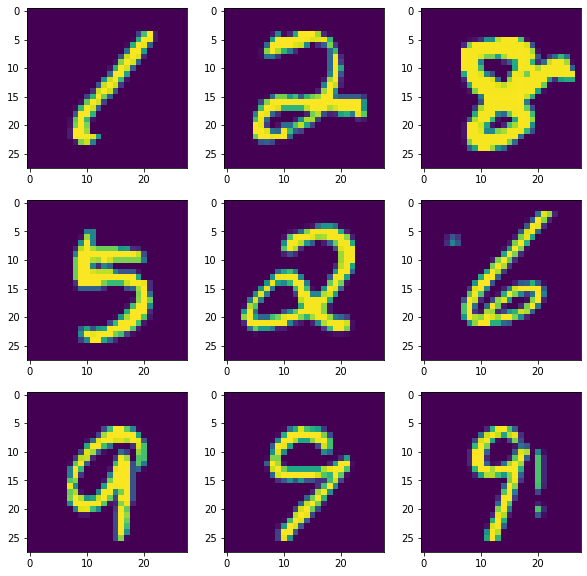

In [4]:
fig,axes=plt.subplots(3,3,figsize=(10,10))

for i, ax  in enumerate(axes.ravel()):
    mean=0.1307
    std =0.3081
    image=((sample_data[0][i]*mean)+std)
    ax.imshow(torch.squeeze(image))


In [201]:
class ConvNet_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc=nn.Linear(32,10)
    self.network = nn.Sequential(
        #  layer 1
        nn.Conv2d(1, 8, 3, padding=1),        
        nn.ReLU(), #  feature map size = (28, 28)
        nn.BatchNorm2d(8),
        #  layer 2
        nn.Conv2d(8, 8, 3, padding=1),        
        nn.ReLU(),
        nn.BatchNorm2d(8),        
        nn.MaxPool2d(2), #  feature map size = (14, 14)
        nn.Dropout2d(p=0.2) ,

        #  layer 3
        nn.Conv2d(8, 16, 3, padding=1),       
        nn.ReLU(), #  feature map size = (14, 14)
        nn.BatchNorm2d(16),       

        #  layer 4
        nn.Conv2d(16, 16, 3, padding=1),        
        nn.ReLU(),
        nn.BatchNorm2d(16),        
        nn.MaxPool2d(2), #  feature map size = (7, 7)
        nn.Dropout2d(p=0.2) ,

        #  layer 5
        nn.Conv2d(16, 32, 3, padding=1),       
        nn.ReLU(), #  feature map size = (7, 7)
        nn.BatchNorm2d(32),        

        #  layer 6
        nn.Conv2d(32, 32, 3, padding=1),        
        nn.ReLU(),
        nn.BatchNorm2d(32),        
        nn.MaxPool2d(2), #  feature map size = (3, 3)
        nn.Dropout2d(p=0.2) ,

        #  output layer
        nn.Conv2d(32, 32, 1),
        nn.AvgPool2d(3)
        
    )

  def forward(self, x):
    x = x.view(-1, 1, 28, 28)
    output = self.network(x)
    output=output.view(-1,32)
    output = self.fc(output)
    return F.log_softmax(output)

In [202]:
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv1_bn= nn.BatchNorm2d(32)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv2_bn= nn.BatchNorm2d(64)
#         self.conv2_drop = nn.Dropout2d()        
#         # self.fc1 = nn.Linear(576, 40)
#         # self.fc2 = nn.Linear(40, 10)
#         self.conv3=nn.Conv2d(64,10,kernel_size=1)
#         self.avg_pool=nn.AvgPool2d(5)

#     def forward(self, x):       
        
#         x = F.max_pool2d(self.conv1_bn(F.relu(self.conv2_drop(self.conv1(x)))),2)
#         x = F.max_pool2d(self.conv2_bn(F.relu(self.conv2_drop(self.conv2(x)))),2)  
            
#         x = self.conv3(x)        
#         output=self.avg_pool(x)
       
#         output = output.view(-1, 10)
#         # x = x.view(-1, 576)
#         # x = F.relu(self.fc1(x))
#         # x = F.dropout(x, training=self.training)
#         # x = self.fc2(x)
#         return F.log_softmax(output)

In [203]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ConvNet_1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
            Conv2d-4            [-1, 8, 28, 28]             584
              ReLU-5            [-1, 8, 28, 28]               0
       BatchNorm2d-6            [-1, 8, 28, 28]              16
         MaxPool2d-7            [-1, 8, 14, 14]               0
         Dropout2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,168
             ReLU-10           [-1, 16, 14, 14]               0
      BatchNorm2d-11           [-1, 16, 14, 14]              32
           Conv2d-12           [-1, 16, 14, 14]           2,320
             ReLU-13           [-1, 16, 14, 14]               0
      BatchNorm2d-14           [-1, 16,

<ipython-input-201-86feef7cc6b6>:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(output)


In [204]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        
        data,target = data.to(device),target.to(device)
       
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        
        loss = F.nll_loss(output,target)
        
        running_loss +=loss.item()
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    
    print(f'Epoch [{epoch}/20 ] [{phase} loss: {loss:{5}.{2}}  {phase} accuracy: {accuracy:{10}.{4}}]')
    return loss,accuracy.item()


In [205]:
# model = Net().to(device)

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.5)
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,21):
    epoch_loss, epoch_accuracy = fit(epoch,model,train_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,test_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

<ipython-input-201-86feef7cc6b6>:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(output)


Epoch [1/20 ] [training loss: 0.012  training accuracy:      76.86]
Epoch [1/20 ] [validation loss: 0.0017  validation accuracy:      96.54]
Epoch [2/20 ] [training loss: 0.0027  training accuracy:       95.1]
Epoch [2/20 ] [validation loss: 0.001  validation accuracy:      98.11]
Epoch [3/20 ] [training loss: 0.0018  training accuracy:      96.68]
Epoch [3/20 ] [validation loss: 0.00064  validation accuracy:      98.75]
Epoch [4/20 ] [training loss: 0.0015  training accuracy:      97.22]
Epoch [4/20 ] [validation loss: 0.00056  validation accuracy:      98.98]
Epoch [5/20 ] [training loss: 0.0012  training accuracy:      97.63]
Epoch [5/20 ] [validation loss: 0.00046  validation accuracy:      99.09]
Epoch [6/20 ] [training loss: 0.0011  training accuracy:      97.87]
Epoch [6/20 ] [validation loss: 0.00043  validation accuracy:      99.14]
Epoch [7/20 ] [training loss: 0.00099  training accuracy:      98.14]
Epoch [7/20 ] [validation loss: 0.0004  validation accuracy:      99.18]
Epo

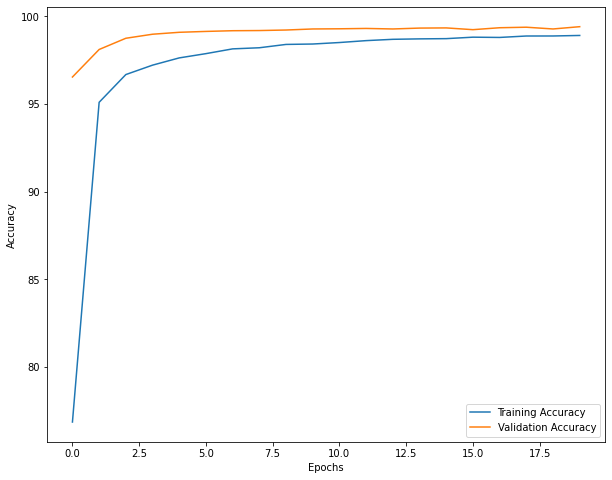

In [206]:
## Plot the logs
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(y=train_accuracy,x=range(len(train_accuracy)),label="Training Accuracy")
sns.lineplot(y=val_accuracy,x=range(len(val_accuracy)),label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

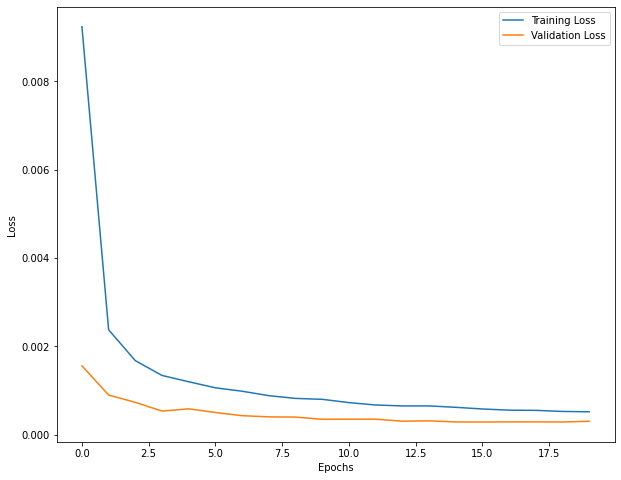

In [149]:
## Plot the logs
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(y=train_losses,x=range(len(train_losses)),label="Training Loss")
sns.lineplot(y=val_losses,x=range(len(val_losses)),label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()